In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from utility import loadData , signsLabels

import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [136]:
df_cnn_epoch = pd.read_csv('output/CNN_epoch_report_v0.csv')

df_cnn_batch = pd.read_csv('output/CNN_batch_report_v0.csv')


,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,S,T,U,V,W,X,Y,accuracy,macro avg,weighted avg
0,precision,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.960352,1.0,...,1.0,0.987805,0.975904,0.994253,1.0,0.981618,1.0,0.991634,0.989665,0.992099
1,recall,1.0,1.0,1.0,1.0,1.0,1.0,0.936782,1.000000,1.0,...,1.0,0.979839,0.913534,1.000000,1.0,1.000000,1.0,0.991634,0.991234,0.991634
2,f1-score,1.0,1.0,1.0,1.0,1.0,1.0,0.967359,0.979775,1.0,...,1.0,0.983806,0.943689,0.997118,1.0,0.990724,1.0,0.991634,0.990159,0.991659
3,support,331.0,432.0,310.0,245.0,498.0,247.0,348.000000,436.000000,288.0,...,246.0,248.000000,266.000000,346.000000,206.0,267.000000,332.0,0.991634,7172.000000,7172.000000


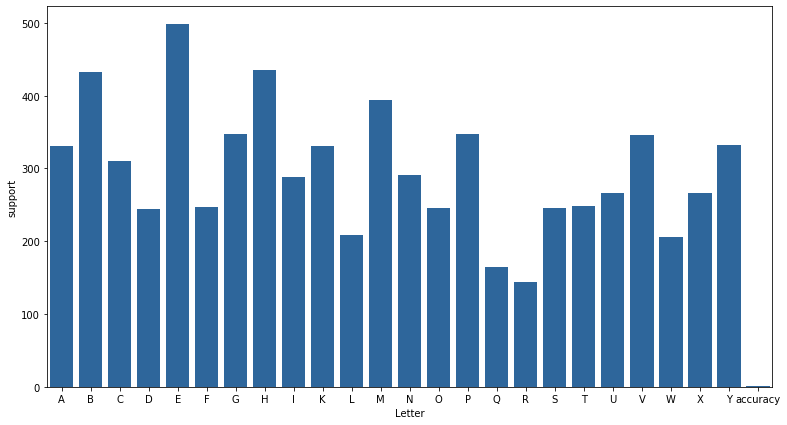

In [186]:
df_cnn_acc = pd.read_csv('output/CNN_classification_report.csv' , index_col = 0)
df_cnn_acc = df_cnn_acc.iloc[: , : 25]
df_cnn_acc = df_cnn_acc.T.reset_index()
df_cnn_acc.columns = ['Letter' , 'precision' , 'recall' , 'f1-score' , 'support']


fig = plt.figure(figsize =(13,7))
ax = sns.barplot(x="Letter", y="support" ,data=df_cnn_acc , color = '#1c67ad')

plt.savefig('output/CNN_REPORT2.png', format="png")
plt.show()

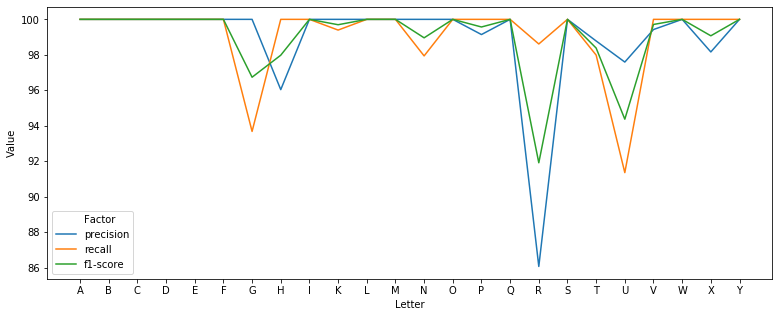

In [190]:
df_cnn_acc = pd.read_csv('output/CNN_classification_report.csv')
df_cnn_acc = df_cnn_acc.iloc[:3 , : 25]
df_cnn_acc = df_cnn_acc.melt(id_vars='Unnamed: 0')
df_cnn_acc.columns = ['Factor', 'Letter' , 'Value']
df_cnn_acc['Value'] = df_cnn_acc['Value'] * 100
df_cnn_acc.head()

fig = plt.figure(figsize =(13,5))
ax = sns.lineplot(x="Letter", y="Value", hue = 'Factor' ,data=df_cnn_acc , color = '#1c67ad')

plt.savefig('output/CNN_REPORT1.png', format="png")
    
plt.show()

In [208]:
df_cnn_RF = pd.read_csv('output/RF_classification_report.csv' , index_col = 0)
df_cnn_SVM = pd.read_csv('output/SVM_classification_report.csv' , index_col = 0)
df_cnn_KNN = pd.read_csv('output/KNN_classification_report.csv' , index_col = 0)
data = { 'Letter' :  df_cnn_RF.iloc[: , : 24].T.index ,
        'RF': df_cnn_RF.iloc[: , : 24].T['f1-score'] ,
        'SVM': df_cnn_SVM.iloc[: , : 24].T['f1-score'] ,
        'KNN': df_cnn_KNN.iloc[: , : 24].T['f1-score']
       }
df = pd.DataFrame(data)
df.head()

,Letter,RF,SVM,KNN
A,A,0.960813,0.925874,0.887399
B,B,0.944641,0.973872,0.940629
C,C,0.962382,0.867332,0.974843
D,D,0.915187,0.966469,0.845173
E,E,0.918288,0.970760,0.860465


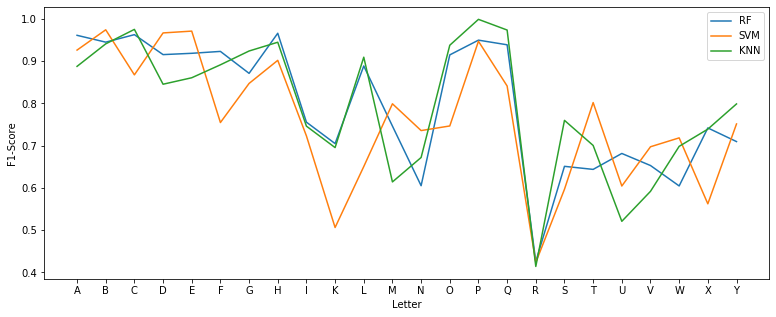

In [219]:

fig = plt.figure(figsize =(13,5))
ax = sns.lineplot(x="Letter", y="RF",data=df , label ='RF')
sns.lineplot(x="Letter", y="SVM", data=df , label ='SVM')
sns.lineplot(x="Letter", y="KNN", data=df , label ='KNN')
ax.set_ylabel('F1-Score')
plt.savefig('output/Compare.png', format="png")
plt.show()

In [224]:
df_cnn_RF = pd.read_csv('output/RF_classification_report.csv' , index_col = 0)
df_cnn_SVM = pd.read_csv('output/SVM_classification_report.csv' , index_col = 0)
df_cnn_KNN = pd.read_csv('output/KNN_classification_report.csv' , index_col = 0)
data = { 'Letter' :  df_cnn_RF.iloc[: , : 24].T.index ,
        'RF_precision': df_cnn_RF.iloc[: , : 24].T['precision'] ,
        'RF_recall': df_cnn_RF.iloc[: , : 24].T['recall'] ,
        'SVM_precision': df_cnn_SVM.iloc[: , : 24].T['precision'] ,
        'SVM_recall': df_cnn_SVM.iloc[: , : 24].T['recall'] ,
        'KNN_precision': df_cnn_KNN.iloc[: , : 24].T['precision'],
        'KNN_recall': df_cnn_KNN.iloc[: , : 24].T['recall']
       }
df = pd.DataFrame(data)
df.to_csv('output/compare.csv')
df.head()


,Letter,RF_precision,RF_recall,SVM_precision,SVM_recall,KNN_precision,KNN_recall
A,A,0.924581,1.000000,0.861979,1.000000,0.797590,1.000000
B,B,0.961631,0.928241,1.000000,0.949074,0.946136,0.935185
C,C,0.935976,0.990323,0.777494,0.980645,0.950920,1.000000
D,D,0.885496,0.946939,0.935115,1.000000,0.763158,0.946939
E,E,0.890566,0.947791,0.943182,1.000000,0.775806,0.965863


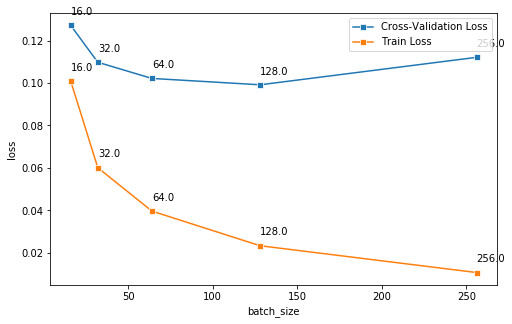

In [188]:
fig = plt.figure(figsize =(8,5))


g = sns.lineplot(x="batch_size", y="val_loss", data=df_cnn_batch, label='Cross-Validation Loss' , marker="s")
g =sns.lineplot(x="batch_size", y="loss", data=df_cnn_batch, label='Train Loss', marker="s")

for index , row in df_cnn_batch.iterrows():
    g.text(row['batch_size'] ,row['val_loss']  + 0.005 , str(row['batch_size']))
    g.text(row['batch_size'] ,row['loss'] + 0.005, str(row['batch_size']))
    
        
plt.savefig('output/CNN_batch.png', format="png")
plt.show()

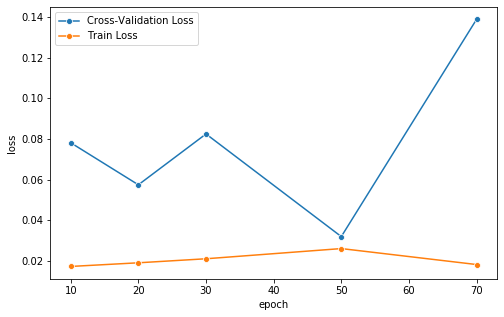

In [189]:
fig = plt.figure(figsize =(8,5))

sns.lineplot(x="epoch", y="val_loss", data=df_cnn_epoch, label='Cross-Validation Loss' , marker="o")
sns.lineplot(x="epoch", y="loss", data=df_cnn_epoch, label='Train Loss', marker="o")

plt.savefig('output/CNN_epoch.png', format="png")
plt.show()